In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
import pca
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from scipy import stats

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
df = pd.read_csv('final_mfrc_data.csv', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61226 entries, 0 to 61225
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        61226 non-null  object
 1   subreddit   61226 non-null  object
 2   bucket      61226 non-null  object
 3   annotator   61226 non-null  object
 4   annotation  61226 non-null  object
 5   confidence  61184 non-null  object
dtypes: object(6)
memory usage: 2.8+ MB


### Box plot
Bar graph filled with all the bars like the storage on your phone

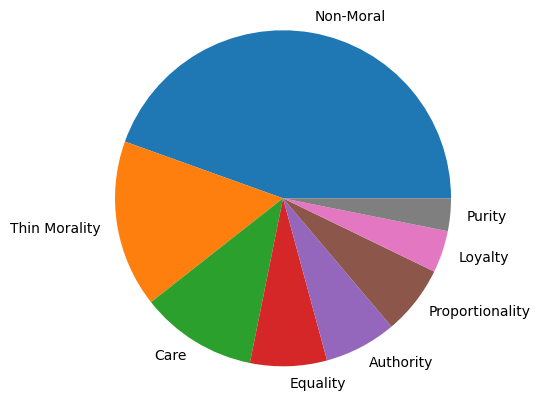

In [20]:
# df['annotator'].unique()
# fig, ax = plt.subplots(figsize=(15, 6))
# sns.boxplot(x='annotator', y='annotation', data=df, palette='rainbow')

data = {
    'Non-Moral': 30774, 
    'Thin Morality': 11123, 
    'Care': 7761, 
    'Equality': 5105, 
    'Authority': 4807, 
    'Proportionality': 4593, 
    'Loyalty': 2794, 
    'Purity': 2171
};

names = list(data.keys());
values = list(data.values());

# Plot
plt.pie(values, labels=names);

plt.axis('equal');
plt.show();


### Histogram
Yaga

In [15]:
fig = px.histogram(df, x = 'annotation')
fig.show()

### Heatmap 
Yaga

/var/folders/rv/71fzb0vx47z78h2tq2v2p8840000gn/T/ipykernel_16120/1901996316.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



ValueError: zero-size array to reduction operation fmin which has no identity

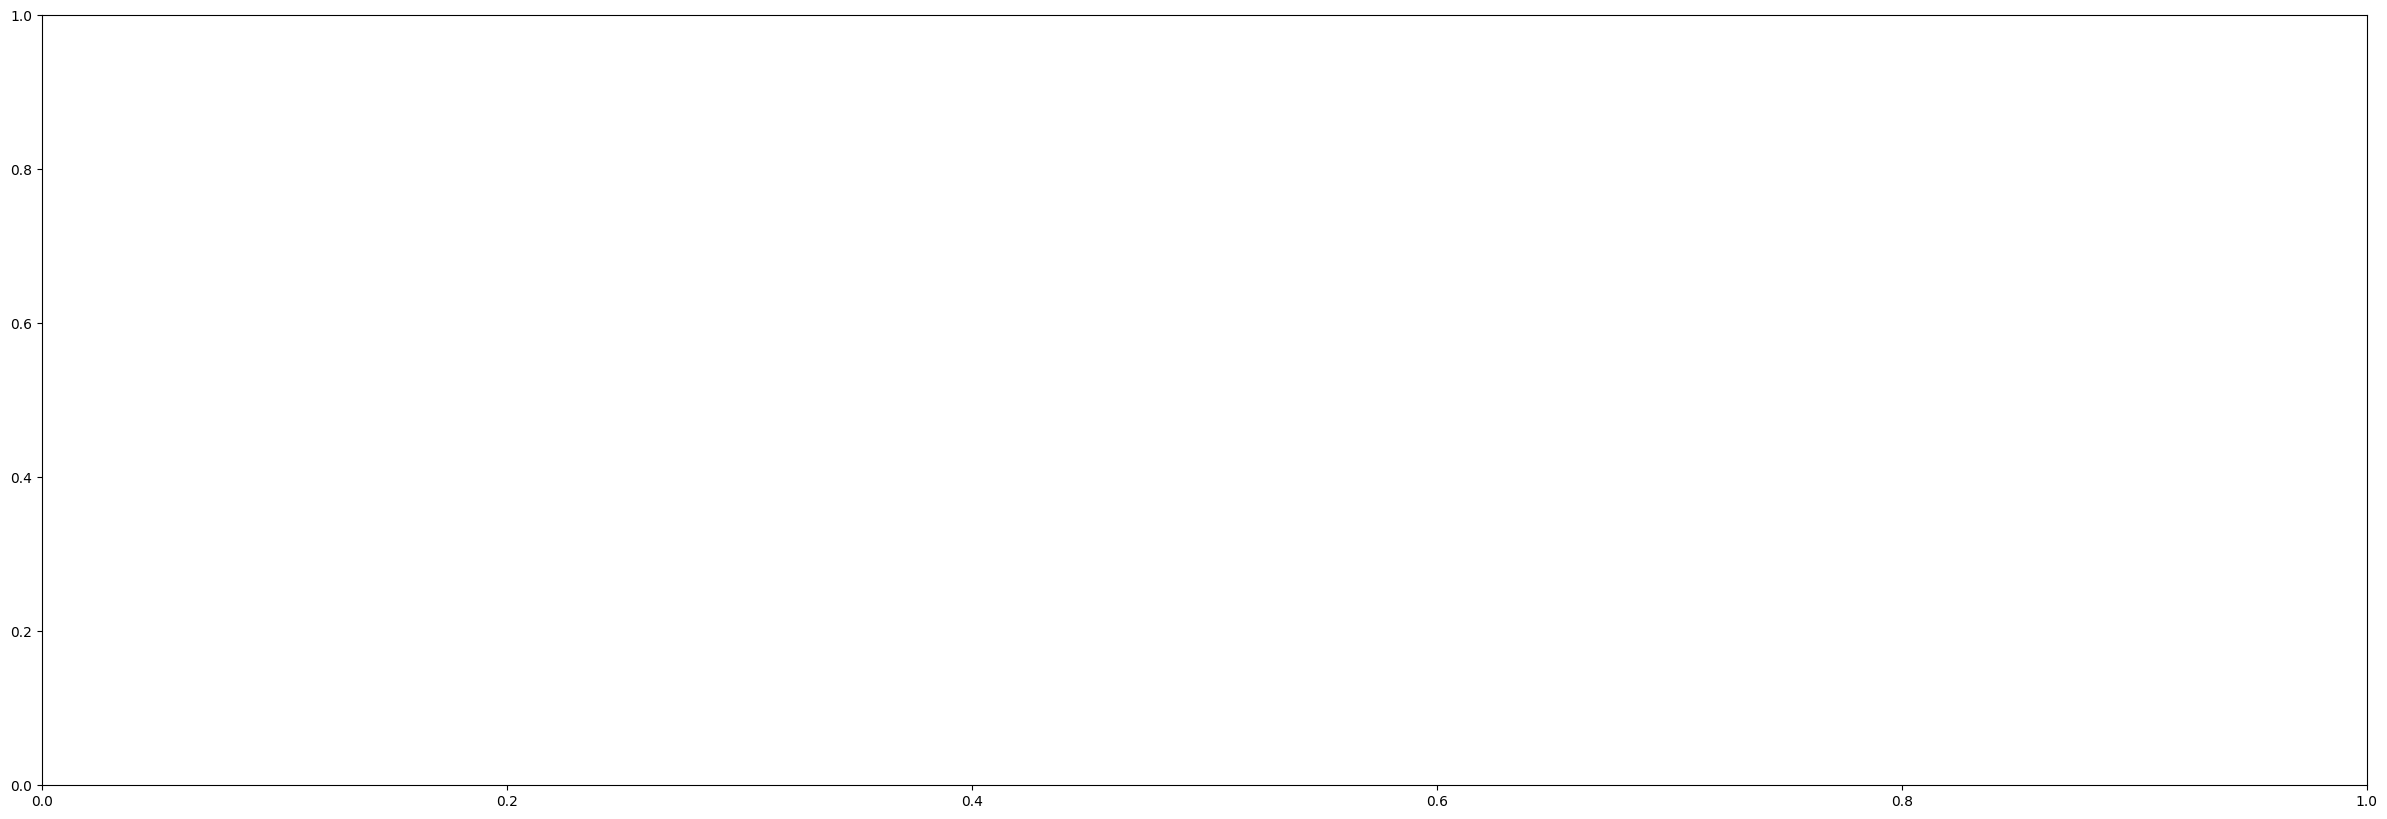

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))
cor_df = df.corr(method = "pearson").round(2)
sns.heatmap(cor_df, ax=ax, annot=True)

# Generate annotation labels array (of the same size as the heatmap data)- filling cells you don't want to annotate with an empty string ''
annot_labels = np.empty_like(cor_df, dtype=str)
annot_mask = cor_df >= 0.8
annot_labels[annot_mask] = 'T' 
# Plot hearmap with the annotations
fig, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(cor_df, annot=annot_labels, fmt='')